<a href="https://colab.research.google.com/github/ola20khaled/Learning_Machine_Learning/blob/main/Digit_Classification_Project_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
digits = tf.keras.datasets.mnist

In [3]:
(train_digits, train_labels), (test_digits, test_labels) = digits.load_data(path="mnist.npz")

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
train_digits.shape

(60000, 28, 28)

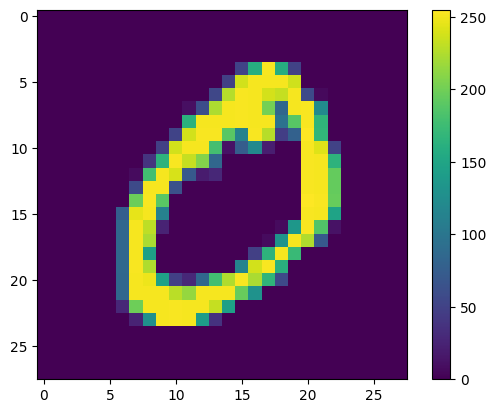

In [5]:
plt.figure()
plt.imshow(train_digits[1])
plt.colorbar()
plt.grid(False)
plt.show()

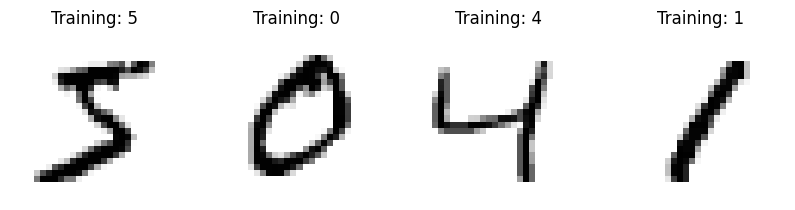

In [6]:
_ , axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax, image, label in zip(axes, train_digits, train_labels):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title(f"Training: {label}")

In [7]:
# Normalization

train_digits = tf.keras.utils.normalize(train_digits, axis=1)
test_digits = tf.keras.utils.normalize(test_digits, axis=1)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.fit(train_digits, train_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 19s 8ms/step - loss: 0.2658 - accuracy: 0.9227
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1064 - accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0735 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0542 - accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0412 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0318 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0260 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0220 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0181 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0160 - acc

In [11]:
test_loss, test_acc = model.evaluate(test_digits, test_labels, verbose=2)

print(f"\nTest accuracy: {test_acc}")
print(f"\nTest loss: {test_loss}")

313/313 - 1s - loss: 0.1024 - accuracy: 0.9757 - 707ms/epoch - 2ms/step

Test accuracy: 0.9757000207901001

Test loss: 0.1023607924580574


In [13]:
predictions = model.predict(test_digits)

313/313 [==============================] - 1s 2ms/step


In [17]:
def draw(n):
    plt.imshow(n,cmap=plt.cm.gray_r, interpolation="nearest")
    plt.show()

label: 7
prediction: 7


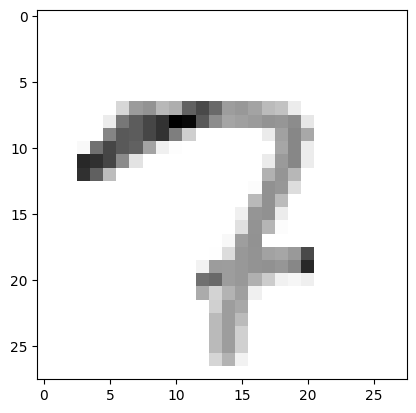

In [20]:
print('label:', test_labels[36])
print('prediction:',np.argmax(predictions[36]))

draw(test_digits[36])